# Computing NBA Players Offensive Ratings in Pandas
Estimating the Offensive Rating of players during the 2020-21 Regular Season, as proposed in Dean Oliver's book "Basketball on Paper". This computation only requires box score information.

![img](https://lh3.googleusercontent.com/proxy/LEsgdWtDy5ATslmwRSl5Z6G1d_ez4oON9i5wKHGt3vljz7MX9rttggnnqGOQO8oAKfi2uvhV2H_bRRNuPPoOVtUfmteqmTvWsB-j)

**NOTE:** This is already computed by the NBA Stats, following [this link](https://www.nba.com/stats/players/advanced/?Season=2020-21&SeasonType=Regular%20Season&sort=GP&dir=-1) (it should be even more accurate). This is just an exercise.

In [1]:
from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats
import plotly.express as px

## Data Obtention
We need to get players' data and teams' data.

In [ ]:
# Let's choose the season we want to study and get all the columns we will need for each player/team.
season = "2020-21"
player_columns = [
    "PLAYER_NAME", "TEAM_ID", "MIN", "FGM", "FGA", "FG_PCT",
    "FG3M", "FG3_PCT", "FTM", "FTA", "FT_PCT", "AST", "PTS", "OREB", "TOV"
]
team_columns = [
    "TEAM_ID", "TEAM_NAME", "MIN", "FTM", "FTA", "FT_PCT", "AST", "FGM",
    "FGA", "FG_PCT", "FG3M", "PTS", "OREB", "OPP_DREB", "TOV",
]

In [2]:
# Player data
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season=season).get_data_frames()[0]
player_stats = player_stats[player_columns]
player_stats.head()

,PLAYER_NAME,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3_PCT,FTM,FTA,FT_PCT,AST,PTS,OREB,TOV
0,Aaron Gordon,1610612743,1383.780000,231,499,0.463,59,0.335,97,149,0.651,161,618,77,97
1,Aaron Holiday,1610612754,1176.086667,170,436,0.390,67,0.368,68,83,0.819,123,475,15,66
2,Aaron Nesmith,1610612738,668.731667,78,178,0.438,40,0.370,22,28,0.786,23,218,28,23
3,Abdel Nader,1610612756,355.250000,57,116,0.491,18,0.419,28,37,0.757,19,160,7,19
4,Adam Mokoka,1610612741,56.178333,7,19,0.368,1,0.100,0,1,0.000,5,15,1,5


In [3]:
# Team Data
team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
# We need to add Opponent Team Data
team_stats = team_stats.merge(leaguedashteamstats.LeagueDashTeamStats(season=season, measure_type_detailed_defense="Opponent").get_data_frames()[0][["TEAM_ID", "OPP_DREB"]], on="TEAM_ID")
team_stats = team_stats[team_columns]
# Let's rename some columns in this dataframe
team_stats.columns = list(team_stats.columns[:2]) + list(["TEAM_" + col for col in team_stats.columns[2:]])
team_stats.head()


,TEAM_ID,TEAM_NAME,TEAM_MIN,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_AST,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_PTS,TEAM_OREB,TEAM_OPP_DREB,TEAM_TOV
0,1610612737,Atlanta Hawks,3481.0,1417,1745,0.812,1737,2937,6281,0.468,895,8186,760,2352.0,953.0
1,1610612738,Boston Celtics,3476.0,1160,1496,0.775,1689,2985,6401,0.466,979,8109,765,2382.0,1012.0
2,1610612751,Brooklyn Nets,3481.0,1305,1623,0.804,1929,3106,6289,0.494,1020,8537,640,2348.0,975.0
3,1610612766,Charlotte Hornets,3471.0,1146,1505,0.761,1933,2875,6324,0.455,985,7881,762,2487.0,1069.0
4,1610612741,Chicago Bulls,3476.0,995,1258,0.791,1927,3035,6380,0.476,904,7969,693,2410.0,1089.0


In [4]:
# Merge Player and Team data
player_stats = player_stats.merge(team_stats, on="TEAM_ID")
player_stats.head()

,PLAYER_NAME,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3_PCT,FTM,FTA,...,TEAM_FT_PCT,TEAM_AST,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_PTS,TEAM_OREB,TEAM_OPP_DREB,TEAM_TOV
0,Aaron Gordon,1610612743,1383.780000,231,499,0.463,59,0.335,97,149,...,0.803,1933,3114,6422,0.485,927,8284,758,2314.0,972.0
1,Austin Rivers,1610612743,844.968333,104,245,0.424,55,0.369,22,31,...,0.803,1933,3114,6422,0.485,927,8284,758,2314.0,972.0
2,Bol Bol,1610612743,159.656667,25,58,0.431,9,0.375,10,15,...,0.803,1933,3114,6422,0.485,927,8284,758,2314.0,972.0
3,Facundo Campazzo,1610612743,1424.931667,120,315,0.381,76,0.352,80,91,...,0.803,1933,3114,6422,0.485,927,8284,758,2314.0,972.0
4,Greg Whittington,1610612743,12.016667,0,3,0.000,0,0.000,0,0,...,0.803,1933,3114,6422,0.485,927,8284,758,2314.0,972.0


## Computing the Offensive Rating
We can now start computing the stat, using all the columns we have in the new merged dataframe.

Let's start with percentage of minutes played and estimating the amount of Scoring Possessions for each player.

In [5]:
player_stats["MIN_PCT"] = player_stats["MIN"] / player_stats["TEAM_MIN"]
player_stats["qAST"] = player_stats["MIN_PCT"] * 1.14 * (player_stats["TEAM_AST"] - player_stats["AST"]) / player_stats["TEAM_FGM"]
player_stats["qAST"] += (
    (player_stats["MIN_PCT"] * player_stats["TEAM_AST"] - player_stats["AST"]) /
    (player_stats["MIN_PCT"] * player_stats["TEAM_FGM"] - player_stats["FGM"])
) * (1 - player_stats["MIN_PCT"])

In [6]:
player_stats["FGPart"] = player_stats["FGM"] * (1 - 0.25 * ((player_stats["PTS"] - player_stats["FTM"]) / player_stats["FGA"]) * player_stats["qAST"])

In [7]:
player_stats["ASTPart"] = 0.25 * (
    (player_stats["TEAM_PTS"] - player_stats["TEAM_FTM"] - (player_stats["PTS"] - player_stats["FTM"])) / (player_stats["TEAM_FGA"] - player_stats["FGA"])
) * player_stats["AST"]

In [8]:
player_stats["FTPart"] = (1 - (1 - player_stats["FT_PCT"]) ** 2) * 0.4 * player_stats["FTA"]

In [9]:
player_stats["TEAM_SCPoss"] = player_stats["TEAM_FGM"] + (1 - (1 - player_stats["TEAM_FT_PCT"]) ** 2) * player_stats["TEAM_FTA"] * 0.4

In [10]:
player_stats["TEAM_OREB_PCT"] = player_stats["TEAM_OREB"] / (player_stats["TEAM_OPP_DREB"] + player_stats["TEAM_OREB"])

In [11]:
player_stats["TEAM_PLAY_PCT"] = player_stats["TEAM_SCPoss"] / (player_stats["TEAM_FGA"] + player_stats["TEAM_FTA"] * 0.4 + player_stats["TEAM_TOV"])

In [12]:
player_stats["TEAM_OREB_WGT"] = (
    ((1 - player_stats["TEAM_OREB_PCT"]) * player_stats["TEAM_PLAY_PCT"]) /
    ((1 - player_stats["TEAM_OREB_PCT"]) * player_stats["TEAM_PLAY_PCT"] + player_stats["TEAM_OREB_PCT"] * (1 - player_stats["TEAM_PLAY_PCT"]))
)

In [13]:
player_stats["OREBPart"] = player_stats["OREB"] * player_stats["TEAM_OREB_WGT"] * player_stats["TEAM_PLAY_PCT"]

We can now obtain the Total Possessions for each player

In [14]:
player_stats["SCPoss"] = (
    (player_stats["FGPart"] + player_stats["ASTPart"] + player_stats["FTPart"]) * 
    (1 - player_stats["TEAM_OREB"] / player_stats["TEAM_SCPoss"] * player_stats["TEAM_OREB_WGT"] * player_stats["TEAM_PLAY_PCT"]) +
    player_stats["OREBPart"]
)

In [15]:
# Computing Field Goals per Possession
player_stats["FGxPoss"] = (player_stats["FGA"] - player_stats["FGM"]) * (1 - 1.07 * player_stats["TEAM_OREB_PCT"])

In [16]:
player_stats["FTxPoss"] = (1 - player_stats["FT_PCT"]) ** 2 * 0.4 * player_stats["FTA"]

In [17]:
player_stats["TotPoss"] = player_stats["SCPoss"] + player_stats["FGxPoss"] + player_stats["FTxPoss"] + player_stats["TOV"]

We can now compute the Points Produced for each Player

In [18]:
player_stats["PTSProdFGPart"] = 2 * (player_stats["FGM"] + 0.5 * player_stats["FG3M"]) * (1 - 0.25 * (player_stats["PTS"] - player_stats["FTM"]) / player_stats["FGA"] * player_stats["qAST"])

In [19]:
player_stats["PTSProdASTPart"] = 2 * (player_stats["TEAM_FGM"] - player_stats["FGM"] + 0.5 * (player_stats["TEAM_FG3M"] - player_stats["FG3M"])) / (player_stats["TEAM_FGM"] - player_stats["FGM"]) * 0.25 * (player_stats["TEAM_PTS"] - player_stats["TEAM_FTM"] - (player_stats["PTS"] - player_stats["FTM"])) / (player_stats["TEAM_FGA"] - player_stats["FGA"]) * player_stats["AST"]

In [20]:
player_stats["PTSProdOREBPart"] = player_stats["OREB"] * player_stats["TEAM_OREB_WGT"] * player_stats["TEAM_PLAY_PCT"] * player_stats["TEAM_PTS"] / (player_stats["TEAM_FGM"] + (1 - (1 - player_stats["TEAM_FT_PCT"]) ** 2) * 0.4 * player_stats["TEAM_FTA"])

In [21]:
player_stats["PTSProd"] = (player_stats["PTSProdFGPart"] + player_stats["PTSProdASTPart"] + player_stats["FTM"]) * (1 - player_stats["TEAM_OREB"] / player_stats["TEAM_SCPoss"] * player_stats["TEAM_OREB_WGT"] * player_stats["TEAM_PLAY_PCT"]) + player_stats["PTSProdOREBPart"]

Finally, we get the ORtg

In [22]:
player_stats["ORtg"] = 100 * (player_stats["PTSProd"] / player_stats["TotPoss"])

## Let's check

Let's get Lebron James's Offensive Rating for this season.

In [23]:
player_stats.loc[player_stats["PLAYER_NAME"] == "LeBron James", "ORtg"]

150    113.892988
Name: ORtg, dtype: float64

We can calculate the Effective Field Goal % for each player and plot that against their ORtgs, for players that got more than 500 minutes in the season (more than ~7 minutes per game). We can also try and make a regression.

In [24]:
player_stats["EFG_PCT"] = (player_stats["FGM"] + 0.5 * player_stats["FG3M"]) / player_stats["FGA"]

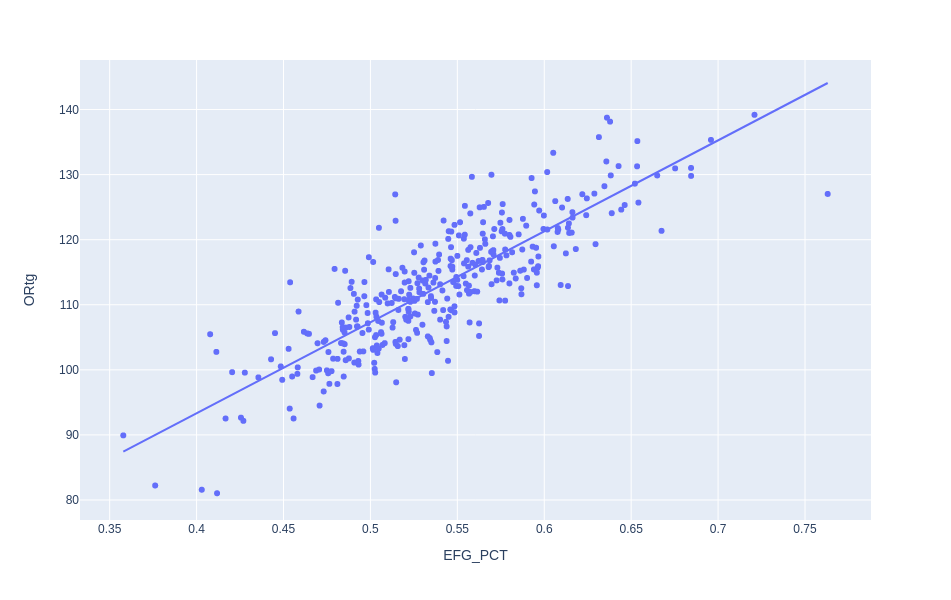

In [29]:
fig = px.scatter(player_stats[player_stats["MIN"] > 500], x="EFG_PCT", y="ORtg", trendline="ols", hover_name="PLAYER_NAME")
fig.update_layout(height=600, width=800)